In [267]:
import h5py as h5
import numpy as np
import pandas as pd
from astroML.density_estimation import KNeighborsDensity

In [6]:
# read in mpcorb data and get (a, e, i)
mpcorb = pd.read_hdf("../catalogues/mpcorb.h5")
mpc_aei = np.array([mpcorb.a, mpcorb.e, mpcorb.i]).T

In [242]:
# instantiate an estimator and fit it to (a, e, i)
estimator = KNeighborsDensity()
estimator.fit(mpc_aei)

In [263]:
%%time

# define a grid of (a, e, i)
# use slightly different sizes so I can tell the difference :D
a = np.logspace(-0.5, 2.0, 1000)
e = np.linspace(0, 1, 1001)
i = np.linspace(0, 180, 1002)

A, E, I = np.meshgrid(a, e, i, indexing="ij")

CPU times: user 1.84 s, sys: 16 s, total: 17.8 s
Wall time: 17.9 s


In [264]:
%%time

# flatten out the grid into the right format
grid = np.array([A.ravel(),E.ravel(),I.ravel()]).T

CPU times: user 3.57 s, sys: 18.9 s, total: 22.4 s
Wall time: 22.5 s


In [265]:
%%time

# perform the density estimation!
# densitites = estimator.eval(grid)

CPU times: user 2d 2h 4min 29s, sys: 1h 33min 14s, total: 2d 3h 37min 44s
Wall time: 2d 3h 41min 45s


In [266]:
np.save("new_densities.npy", densitites)

# Simple example

In [323]:
n = 10
x = np.random.rand(n)
y = np.random.rand(n)

(0.0, 1.0)

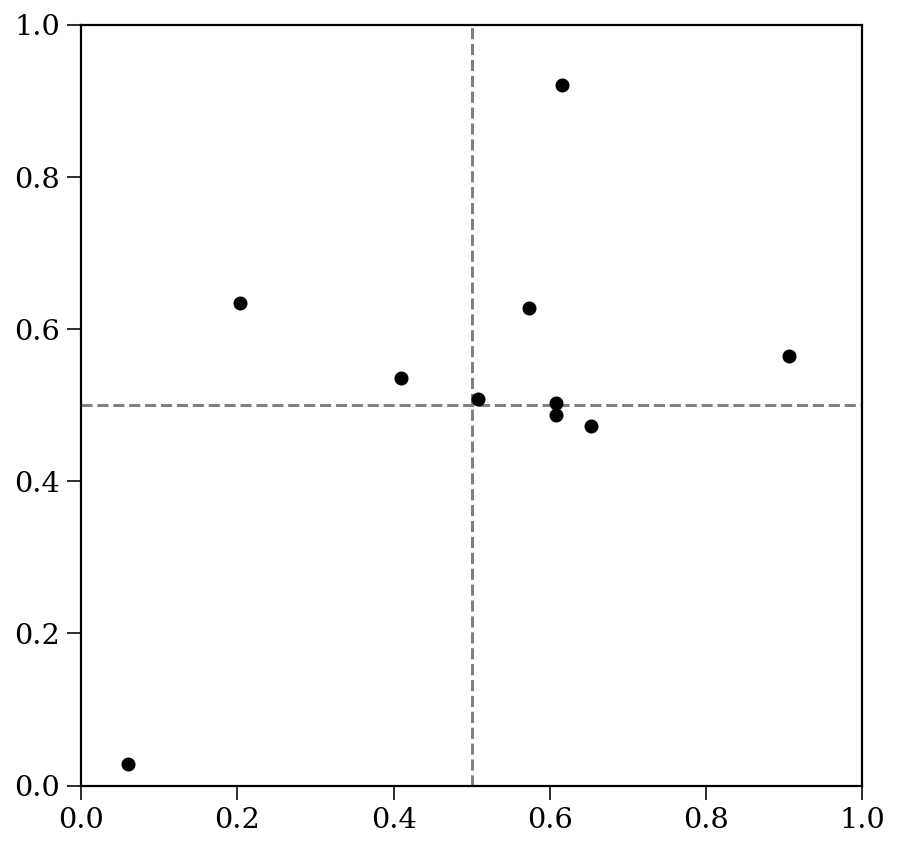

In [355]:
plt.figure(figsize=(7, 7))

plt.axvline(0.5, linestyle="--", color="grey")
plt.axhline(0.5, linestyle="--", color="grey")

# plt.axvspan(0, 0.5, 0.5, 1, color="red", alpha=top_left)
# plt.axvspan(0.5, 1, 0.5, 1, color="red", alpha=top_right)
# plt.axvspan(0, 0.5, 0, 0.5, color="red", alpha=bottom_left)
# plt.axvspan(0.5, 1, 0, 0.5, color="red", alpha=bottom_right)

plt.scatter(x, y, zorder=5, color="black")
plt.xlim(0, 1)
plt.ylim(0, 1)

In [324]:
top_left = len(x[np.logical_and(x < 0.5, y >= 0.5)]) / len(x)
top_right = len(x[np.logical_and(x >= 0.5, y >= 0.5)]) / len(x)
bottom_left = len(x[np.logical_and(x < 0.5, y < 0.5)]) / len(x)
bottom_right = len(x[np.logical_and(x >= 0.5, y < 0.5)]) / len(x)

(0.0, 1.0)

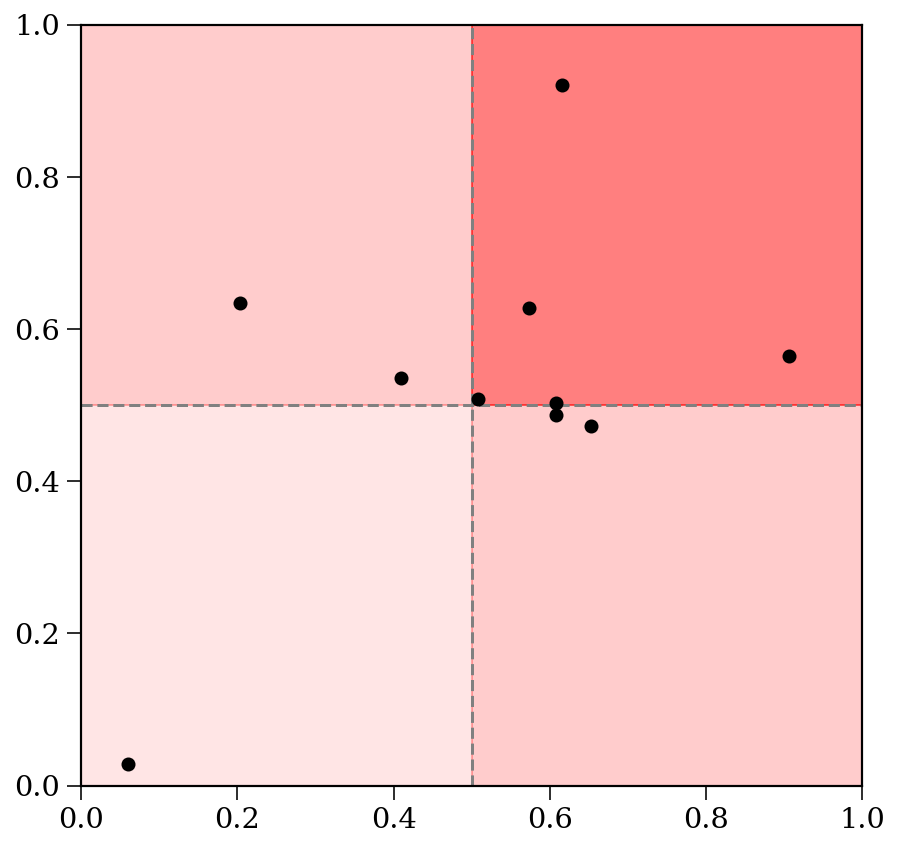

In [325]:
plt.figure(figsize=(7, 7))

plt.axvline(0.5, linestyle="--", color="grey")
plt.axhline(0.5, linestyle="--", color="grey")

plt.axvspan(0, 0.5, 0.5, 1, color="red", alpha=top_left)
plt.axvspan(0.5, 1, 0.5, 1, color="red", alpha=top_right)
plt.axvspan(0, 0.5, 0, 0.5, color="red", alpha=bottom_left)
plt.axvspan(0.5, 1, 0, 0.5, color="red", alpha=bottom_right)

plt.scatter(x, y, zorder=5, color="black")
plt.xlim(0, 1)
plt.ylim(0, 1)

In [348]:
estimator = KNeighborsDensity(n_neighbors=2)
estimator.fit(np.transpose([x, y]))

In [327]:
np.shape([x, y])

(2, 10)

In [328]:
x_range = np.linspace(0, 1, 100)
y_range = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x_range, y_range)

In [329]:
grid = np.array([X.ravel(),Y.ravel()]).T

In [344]:
estimator?

In [349]:
rho = estimator.eval(grid)

In [350]:
rho = rho / rho.sum()

In [351]:
rho = rho.reshape(100, 100)

0.25578481707922346

(0.0, 1.0)

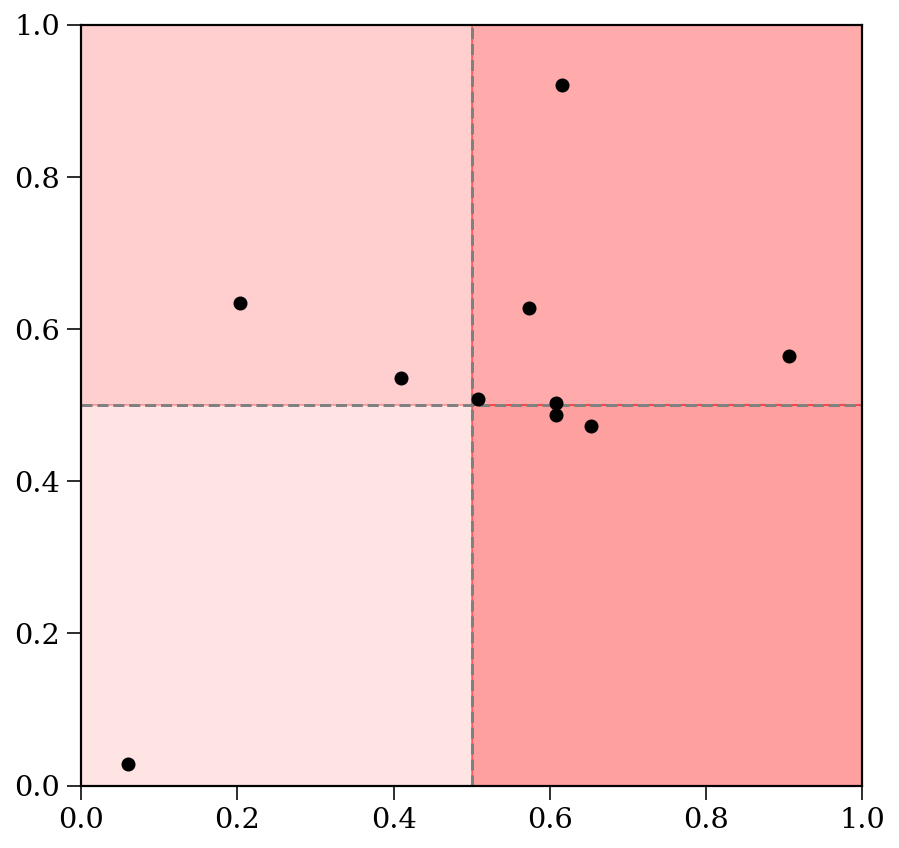

In [353]:
plt.figure(figsize=(7, 7))

plt.axvline(0.5, linestyle="--", color="grey")
plt.axhline(0.5, linestyle="--", color="grey")

plt.axvspan(0, 0.5, 0.5, 1, color="red", alpha=rho[np.logical_and(X < 0.5, Y >= 0.5)].sum())
plt.axvspan(0.5, 1, 0.5, 1, color="red", alpha=rho[np.logical_and(X >= 0.5, Y >= 0.5)].sum())
plt.axvspan(0, 0.5, 0, 0.5, color="red", alpha=rho[np.logical_and(X < 0.5, Y < 0.5)].sum())
plt.axvspan(0.5, 1, 0, 0.5, color="red", alpha=rho[np.logical_and(X >= 0.5, Y < 0.5)].sum())

plt.scatter(x, y, zorder=5, color="black")
plt.xlim(0, 1)
plt.ylim(0, 1)